In [1]:
from PIL import Image
import numpy as np
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

def load_data(metadata_path, real_data_directory, synthetic_data_directory, num_real_folders=1, num_synthetic_images=10):
    metadata = pd.read_excel(metadata_path)
    
    real_images = []
    synthetic_images = []
    labels = []
    
    real_folders = metadata['id'].head(num_real_folders)
    
    finger_folders = ["l_index", "l_little", "l_middle", "l_ring", "l_thumb", 
                      "r_index", "r_little", "r_middle", "r_ring", "r_thumb"]
    
    progress_bar = tqdm(total=(num_real_folders + num_synthetic_images), desc='Loading images', dynamic_ncols=True)
    
    for folder_id in real_folders:
        for finger_folder in finger_folders:
            folder_path = Path(real_data_directory) / str(folder_id) / finger_folder
            
            if folder_path.exists():
                image_files = list(folder_path.glob("*.png"))
                
                for img_path in image_files:
                    img = Image.open(img_path)
                    img = np.array(img)
                    
                    real_images.append(img)
                    
                    label = {
                        'id': folder_id,
                        'gender': metadata.loc[metadata['id'] == folder_id, 'gender'].values[0],
                        'age': metadata.loc[metadata['id'] == folder_id, 'age'].values[0],
                        'melanin': metadata.loc[metadata['id'] == folder_id, 'melanin'].values[0],
                        'cardiovascular_disease': metadata.loc[metadata['id'] == folder_id, 'cardiovascular disease'].values[0],
                        'smoker': metadata.loc[metadata['id'] == folder_id, 'smoker'].values[0],
                        'sport_hobby_with_fingers': metadata.loc[metadata['id'] == folder_id, 'sport/hobby with fingers'].values[0],
                        'alcohol_before_scan': metadata.loc[metadata['id'] == folder_id, 'alcohol before scan'].values[0],
                        'skin_disease': metadata.loc[metadata['id'] == folder_id, 'skin disease'].values[0],
                        'finger': finger_folder
                    }
                    labels.append(label)
                    progress_bar.update(1)
                    if len(real_images) >= 10:  # Break the loop after loading 10 real images
                        break
                if len(real_images) >= 10:
                    break
            if len(real_images) >= 10:
                break
    
    # Load 10 synthetic images from final_synth_data
    synthetic_data_folder = Path(synthetic_data_directory)
    for i in range(1, num_synthetic_images + 1):
        img_path = synthetic_data_folder / f"{i}.jpg"
        try:
            img = Image.open(img_path)
            img = np.array(img)
            synthetic_images.append(img)
            progress_bar.update(1)
        except FileNotFoundError:
            print(f"File '{i}.jpg' not found. Continuing to the next image...")
            continue
    
    progress_bar.close()
    return np.array(real_images), np.array(synthetic_images), labels

# You can call this function to load the data:
real_images, synthetic_images, labels = load_data("data_description.xlsx", "dataset", "final_synth_data", num_real_folders=2, num_synthetic_images=10)


Loading images: 17it [00:20,  1.98it/s]                        

File '5.jpg' not found. Continuing to the next image...


Loading images: 20it [00:21,  1.05s/it]


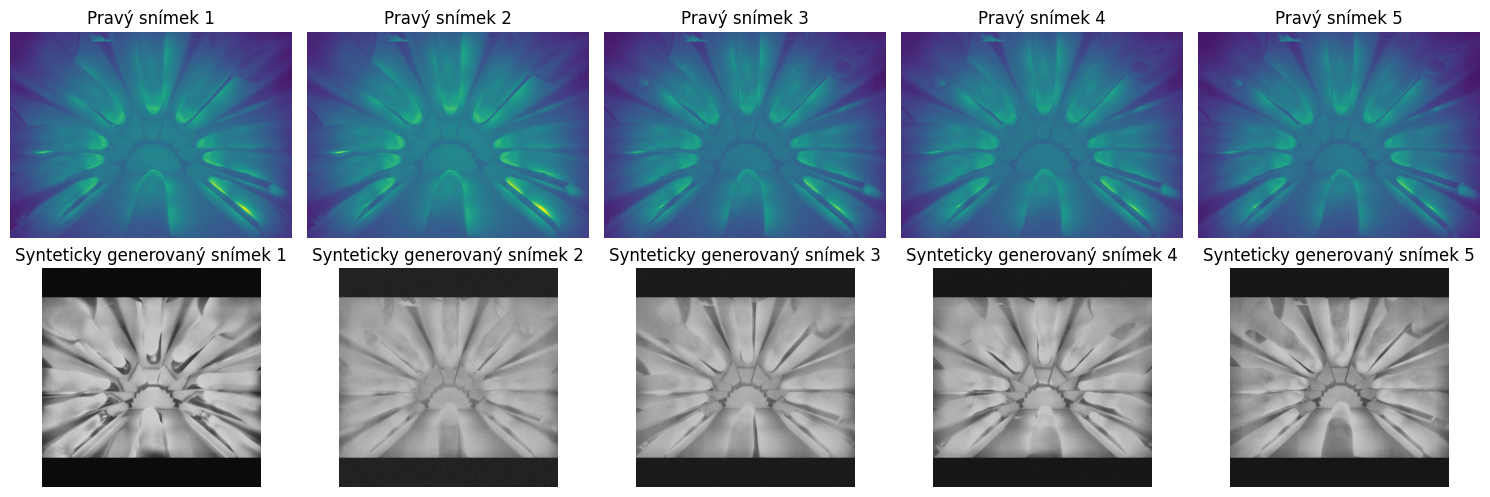

Real Image Mean: 87.20224499141808
Synthetic Image Mean: 119.19326496124268
Real Image Std Deviation: 29.723175005261922
Synthetic Image Std Deviation: 64.02502543498638


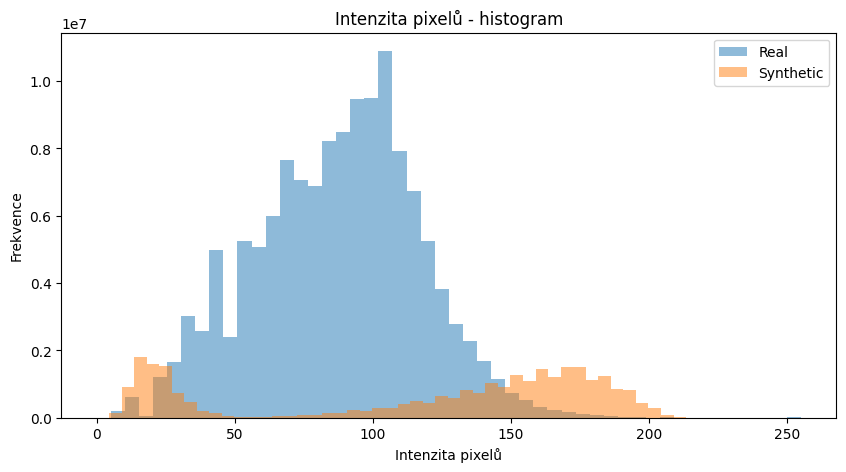

In [2]:
import matplotlib.pyplot as plt

# Display first few real and synthetic images
num_display = 5

# Visual Inspection
fig, axes = plt.subplots(2, num_display, figsize=(15, 5))
for i in range(num_display):
    axes[0, i].imshow(real_images[i])
    axes[0, i].set_title(f"Pravý snímek {i+1}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(synthetic_images[i])
    axes[1, i].set_title(f"Synteticky generovaný snímek {i+1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Statistical Comparison
real_mean = np.mean(real_images)
synthetic_mean = np.mean(synthetic_images)
real_std = np.std(real_images)
synthetic_std = np.std(synthetic_images)

print("Real Image Mean:", real_mean)
print("Synthetic Image Mean:", synthetic_mean)
print("Real Image Std Deviation:", real_std)
print("Synthetic Image Std Deviation:", synthetic_std)

# Histogram Comparison
plt.figure(figsize=(10, 5))
plt.hist(real_images.flatten(), bins=50, alpha=0.5, label='Real')
plt.hist(synthetic_images.flatten(), bins=50, alpha=0.5, label='Synthetic')
plt.legend()
plt.title('Intenzita pixelů - histogram')
plt.xlabel('Intenzita pixelů')
plt.ylabel('Frekvence')
plt.show()


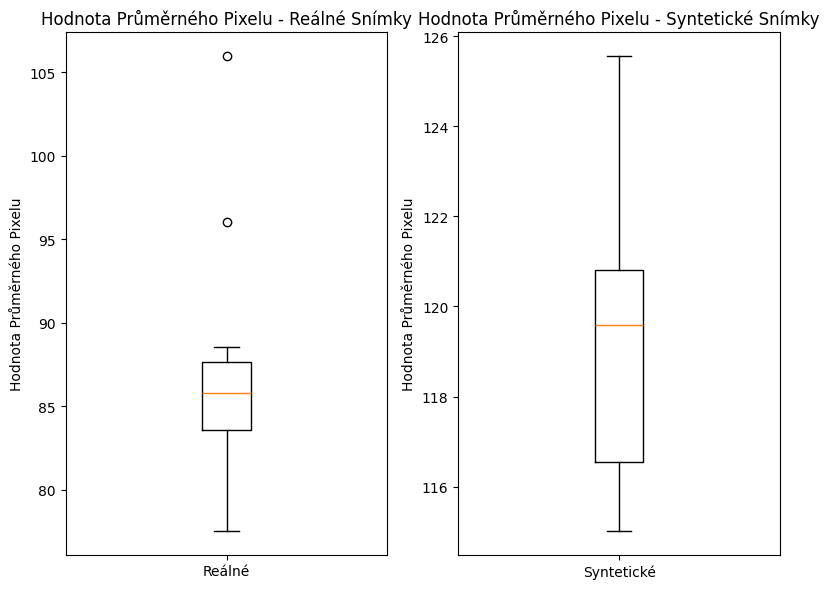

In [3]:
# Calculate mean pixel values for each image
real_mean_values = [np.mean(img) for img in real_images]
synthetic_mean_values = [np.mean(img) for img in synthetic_images]

# Mean Pixel Comparison Plot with Czech labels and titles
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(real_mean_values, labels=['Reálné'])
plt.title('Hodnota Průměrného Pixelu - Reálné Snímky')
plt.ylabel('Hodnota Průměrného Pixelu')

plt.subplot(1, 2, 2)
plt.boxplot(synthetic_mean_values, labels=['Syntetické'])
plt.title('Hodnota Průměrného Pixelu - Syntetické Snímky')
plt.ylabel('Hodnota Průměrného Pixelu')

plt.tight_layout()
plt.show()

